# Convolutional Neural Networks for Image Classification

+ [Load MNIST dataset](#load)
+ [Visualizing the Image Data](#visualize)
+ [PreProcessing Data](#preprocessing)
    + [1.encoding Labels using one hot encoding](#encoding)
    + [2.Normalizing Data](#normalizing)
    + [3.Reshaping the Data](#reshaping)
+ [Training the Model](#training)
    + [Which parameters should we set based on our data and can we play around](#parameters)
+ [Model Evaluation](#evaluation)
+ [Predicting a given image](#predicting)


--------

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

-----

# <a name='load'>Load MNIST data set</a>

In [6]:
from tensorflow.keras.datasets import mnist

As the data is already prepared in split format, we just need to use tuple upacking.

In [8]:
(x_train, y_train), (x_test, y_test) =mnist.load_data()

11493376/11490434 [==============================] - 21s 2us/step


-----

# <a name='visualizing'>Visualizing the Image Data</a>

In [10]:
x_train.shape

# We can see that there are 60,000 images with 28x28 dimensions

(60000, 28, 28)

In [11]:
single_image = x_train[0]

In [12]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

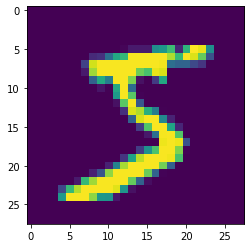

In [17]:
plt.imshow(single_image);

Acutally the image is in grey scale.

**So why are we see this purple, yellow stuffs here?**

As we already knew that matplotlib has different colormaps and default one is `viridis` to show the image.

Thefore, the darkest color became purple and lighest color became yellow when it is using `viridis` colormap to show the image.

### We can change the cmap

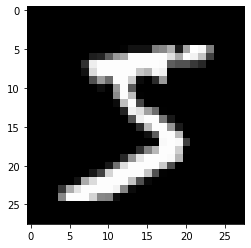

In [19]:
plt.imshow(single_image, cmap='gray');

----

# <a name='preprocessing'>PreProcessing Data</a>

# <a name='encoding'>1) encoding Labels using one hot encoding</a>

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

If we look at the y_train dataset, first index is `5`. So our image is displaying 5 which corresponding to correct label.

In [21]:
from tensorflow.keras.utils import to_categorical

### Before One hot encoding,

In [22]:
y_train.shape

(60000,)

### After one hot encoding,

In [24]:
y_example = to_categorical(y_train)

In [25]:
y_example.shape

(60000, 10)

Now we can see that 1, 2, 3.. etc values are one hot encoded to swtiched on and off values.

Example => if digit is 4 then it is encoded as `0000100000`. we can see the index number where 4 is represented is switched on.

In [26]:
y_example[0] # for value 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Encoding Y_test labels

+ `num_classes`: number of unique classes 

Example for digits it will be 10 unique classes (0,1,2,3,4,5,6,7,8,9)

In [27]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [29]:
y_cat_train = to_categorical(y_train, num_classes=10)

-------

# <a name='normalizing'>2) Normalizing Data</a>

**We can see that a single image is represented by values of `0-255`**

In [30]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [31]:
single_image.min()

0

In [32]:
single_image.max()

255

As we know image is made up of 0-255 values and future images will made up of 0-255 values too. So there is not much changes.

**So we can simply divide by 255 to scale the values between 0 and 1.**

In [33]:
x_train = x_train/255
x_test = x_test/255

In [34]:
scaled_image = x_train[0]

In [35]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [36]:
scaled_image.min(), scaled_image.max()

(0.0, 1.0)

------

# <a name='reshaping'>3)Reshaping the Data</a>

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but **we need to add one more dimension to show we're dealing with 1 RGB channel** (since technically the images are in black and white, only showing values from 0-255 on a single channel), **an color image would have 3 dimensions**.

In [37]:
x_train.shape

(60000, 28, 28)

#### Reshape to include channel dimension (in this case, 1 channel)

In [38]:
# batch size, width, height, color_channels
x_train = x_train.reshape(60000, 28, 28, 1)

In [40]:
x_test = x_test.reshape(10000, 28, 28, 1)

-------

# <a name='training'>Training the Model</a>

### 4 main hyperparameters for Conv2D

- **filters**: more classes you try to predict, the more filter you should add. (common to use based on power of 2, starting point can be 32).

- **kernel_size**: typical size is 2x2, 4x4, etc. can keep expanding it based on your data. start point can be 4x4.

- **strides**: how big of a stride are we taking as we are moving the kernel along this image? in our case our images are 28x28 and our chosen kernel is 4x4. So it will take 28/4 = 7 times to scan the image.

- **padding**: Valid, Same


https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t

In [43]:
28*28

784

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [46]:
model = Sequential()

# One Set, as our model is simple we will use one set only
# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28, 1), activation='relu')) # our images are 28x28 with 1 color channel, we also use default padding and stride

# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Flattening the image from 28x28 to 784 before the final layer
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
# Multiclassfication problem => softmax
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/    => can refer various metrics avaliable
model.compile(loss='categorical_crossentropy', optimizer='adam',
                         metrics=['accuracy'])

# <a name='parameters'>Which parameters </a>
+ should we set based on our data?
+ can we play around ?

### Parameters to set based on our data
![set](set_parameters.png)

### Parameters that we can play around
![play](play_around_parameters.png)

### Check model summary

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Add in Early Stopping

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
# we can also use val_accuracy
early_stopping = EarlyStopping(monitor='val_loss', patience=1, verbose=1) 

# Train the Model

In [52]:
model.fit(x_train, y_cat_train, 
              validation_data=(x_test, y_cat_test),
              epochs=10, 
              callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1387 - accuracy: 0.9596 - val_loss: 0.0781 - val_accuracy: 0.9755
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0474 - accuracy: 0.9850 - val_loss: 0.0402 - val_accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0300 - accuracy: 0.9908 - val_loss: 0.0469 - val_accuracy: 0.9845
Epoch 00003: early stopping


------

# <a name='evaluation'>Model Evaluation </a>

In [54]:
model.metrics_names

['loss', 'accuracy']

As we have set accuracy too, there will be 2 metrics. 

In [55]:
metrics = pd.DataFrame(model.history.history)

In [56]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.138661,0.959650,0.078134,0.9755
1,0.047412,0.985017,0.040236,0.9866
2,0.029994,0.990767,0.046923,0.9845


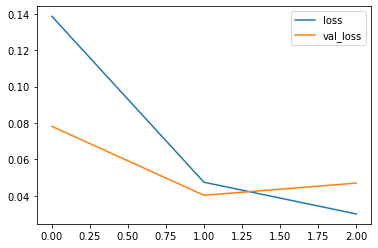

In [57]:
metrics[['loss', 'val_loss']].plot();

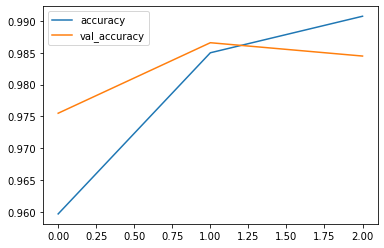

In [58]:
metrics[['accuracy', 'val_accuracy']].plot();

------

In [59]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.046923402696847916, 0.984499990940094]

the above numbers `loss` and `accuracy` are essentially same as the very last epochs's result.

-----

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
predictions = np.argmax(model.predict(x_test), axis=-1)

### Comparing with actual y_test values (no longer categorical encoded values)

In [64]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [66]:
confusion_matrix(y_test, predictions)

array([[ 975,    1,    0,    1,    0,    0,    2,    0,    1,    0],
       [   0, 1133,    1,    0,    0,    0,    1,    0,    0,    0],
       [   2,    3, 1017,    0,    0,    0,    3,    5,    2,    0],
       [   0,    0,    2,  993,    0,   10,    0,    2,    1,    2],
       [   1,    2,    0,    0,  970,    0,    3,    1,    0,    5],
       [   4,    0,    0,    8,    0,  871,    7,    0,    1,    1],
       [   5,    3,    0,    0,    1,    2,  947,    0,    0,    0],
       [   1,    2,    8,    0,    1,    0,    0, 1012,    1,    3],
       [   7,    1,    3,    0,    0,    1,    1,    2,  957,    2],
       [   3,    4,    0,    4,    8,    3,    0,   11,    6,  970]],
      dtype=int64)

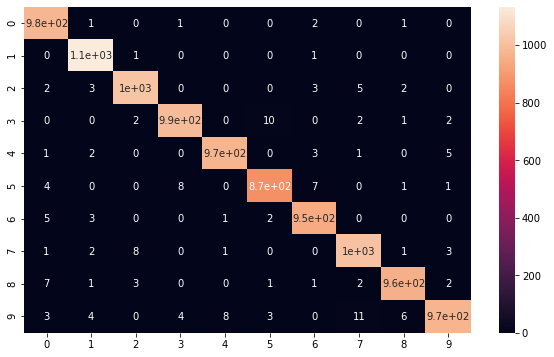

In [68]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True);

--------

# <a name='predicting'>Predicting a given image</a>

In [69]:
my_number = x_test[0]

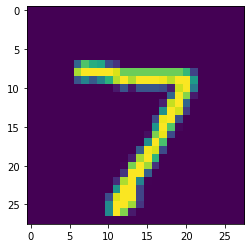

In [72]:
plt.imshow(my_number.reshape(28,28));

In [73]:
# need to reshape the image
# Number of image, width, height, number of color channels

np.argmax(model.predict(my_number.reshape(1, 28, 28, 1)), axis=-1)

array([7], dtype=int64)